# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 501):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,453395,en,3901.541,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,Doctor Strange in the Multiverse of Madness,7.5,2439
1,2,False,864116,en,1337.647,/8Kce1utfytAG5m1PbtVoDzmDZJH.jpg,A Day to Die,6.2,79
2,3,False,897424,en,772.922,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,Dark Cloud,6.7,26
3,4,False,661791,es,622.955,/eIUixNvox4U4foL5Z9KbN9HXYSM.jpg,The Grandmother,5.9,184
4,5,False,908762,en,457.800,/7l9qEWdSzki33Q3SKD1d5uvJBEo.jpg,My Fake Boyfriend,6.4,22


In [7]:
df.drop(columns=['page_number', 'adult'], inplace=True)         # drop page number and adult columns
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,453395,en,3901.541,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,Doctor Strange in the Multiverse of Madness,7.5,2439
1,864116,en,1337.647,/8Kce1utfytAG5m1PbtVoDzmDZJH.jpg,A Day to Die,6.2,79
2,897424,en,772.922,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,Dark Cloud,6.7,26
3,661791,es,622.955,/eIUixNvox4U4foL5Z9KbN9HXYSM.jpg,The Grandmother,5.9,184
4,908762,en,457.800,/7l9qEWdSzki33Q3SKD1d5uvJBEo.jpg,My Fake Boyfriend,6.4,22
...,...,...,...,...,...,...,...
495,780,fr,10.029,/8OYGtQlO8k9PcOm49apV62eVJQo.jpg,The Passion of Joan of Arc,8.1,664
496,9283,en,10.014,/sHcx1fBmrtZYvFmUywU0d5cvIFd.jpg,Beautiful Girls,6.7,285
497,94380,en,10.004,/d3b6f3OBRKTN6sOULUCQGNlIfBp.jpg,Bad Ass,5.8,321
498,520318,en,9.981,/mKp5RBvc1HVC3wvTLLHJ334HHnk.jpg,Fatima,7.2,80


In [8]:
df.shape

(500, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        500 non-null    object 
 4   title              500 non-null    object 
 5   vote_average       500 non-null    float64
 6   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,500,500,500,500
unique,500,20,500,499
top,22,en,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,Project X
freq,1,368,1,2


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,500.000000,500.00000,500.000000
mean,45.639646,6.32860,1355.642000
std,192.572942,1.49033,2891.501495
min,9.964000,0.00000,0.000000
25%,12.492000,5.90000,90.000000
50%,17.403000,6.50000,338.500000
75%,32.628750,7.10000,1335.250000
max,3901.541000,9.50000,31729.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

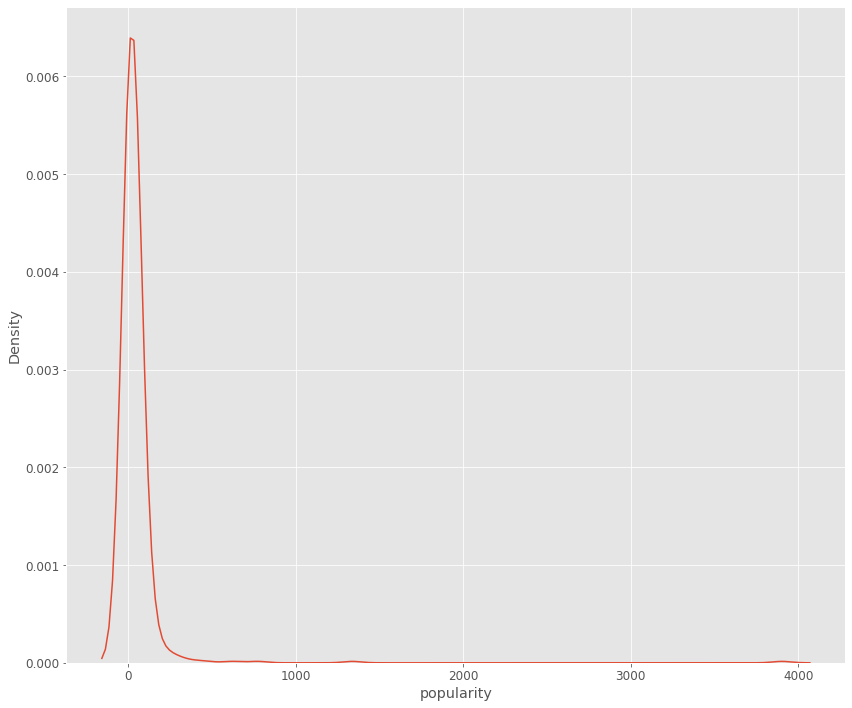

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

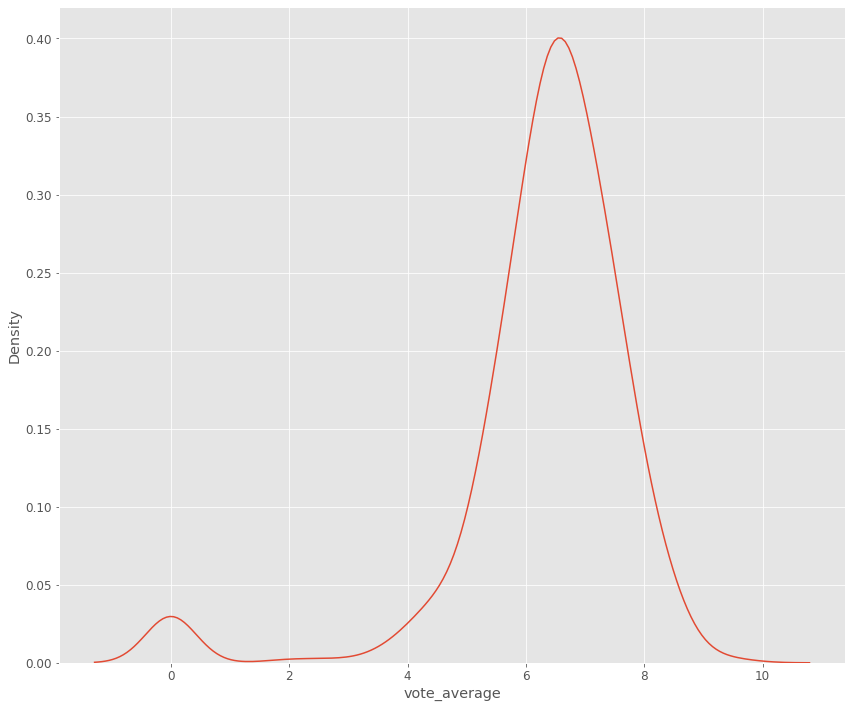

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

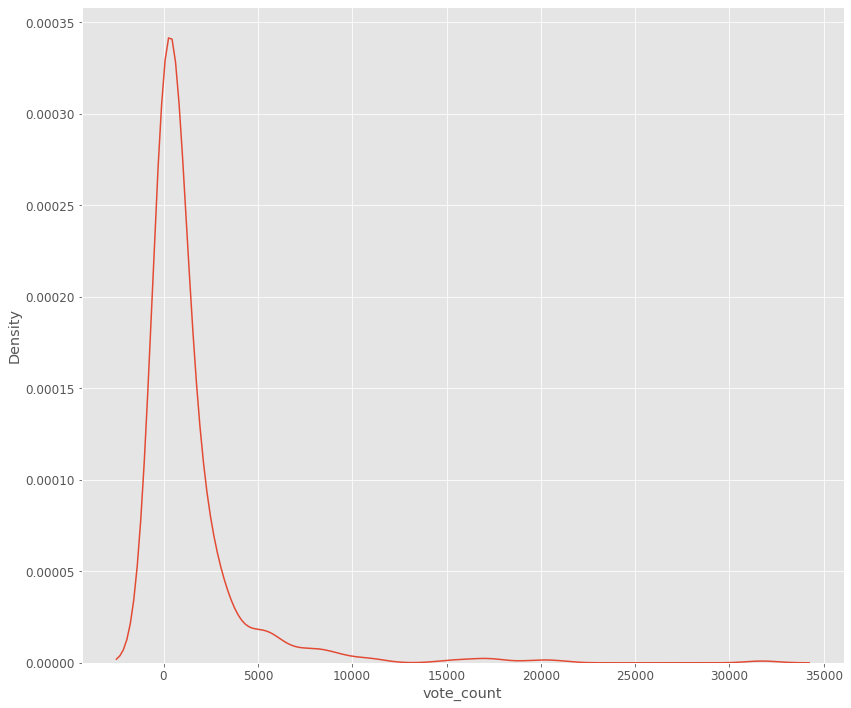

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

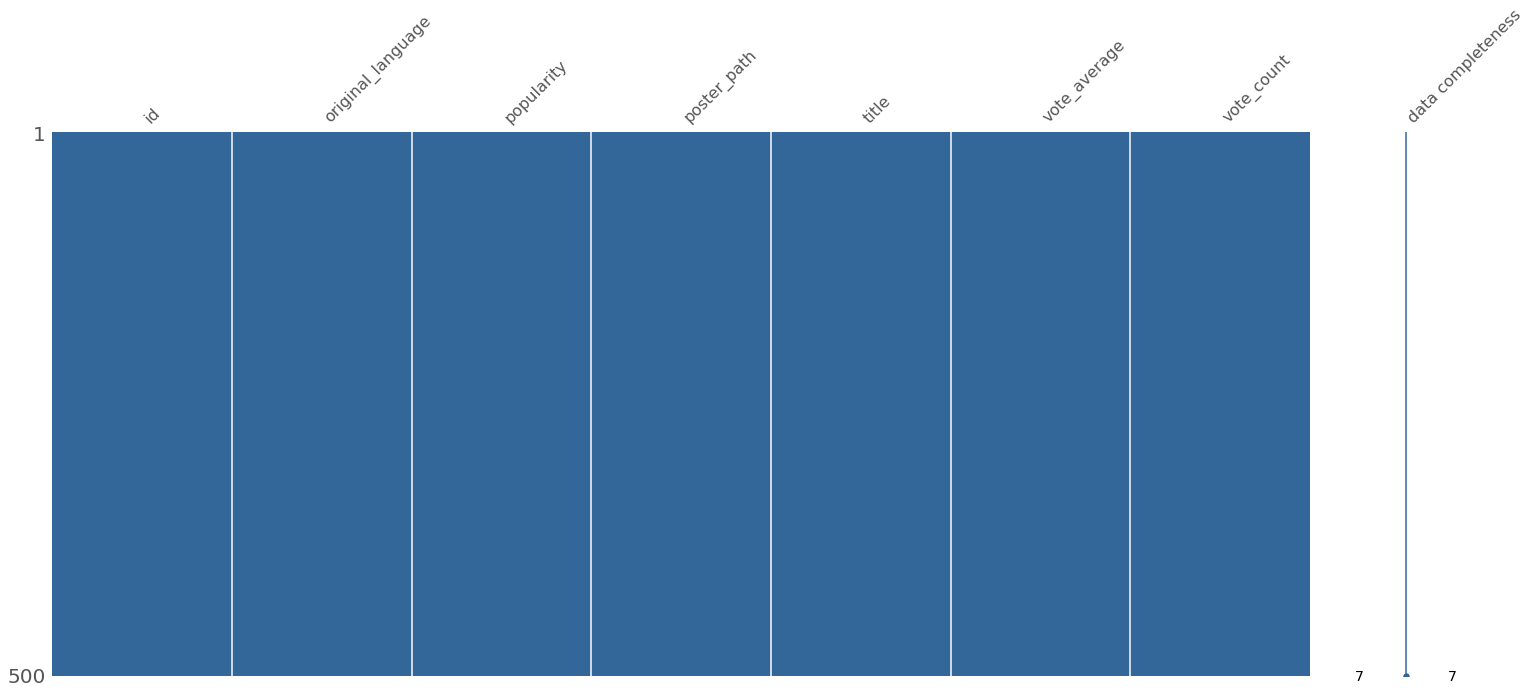

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

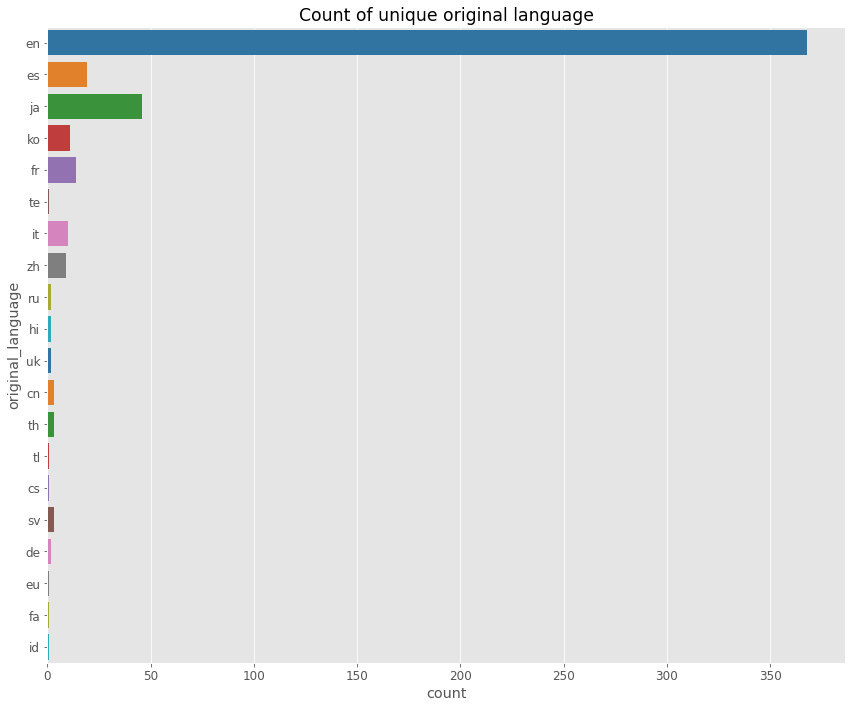

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

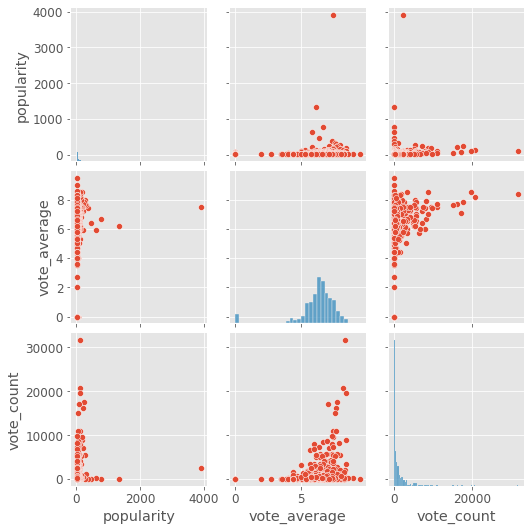

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()     # compute pairwise correlation
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.067074,0.087786
vote_average,0.067074,1.000000,0.233654
vote_count,0.087786,0.233654,1.000000


<AxesSubplot:>

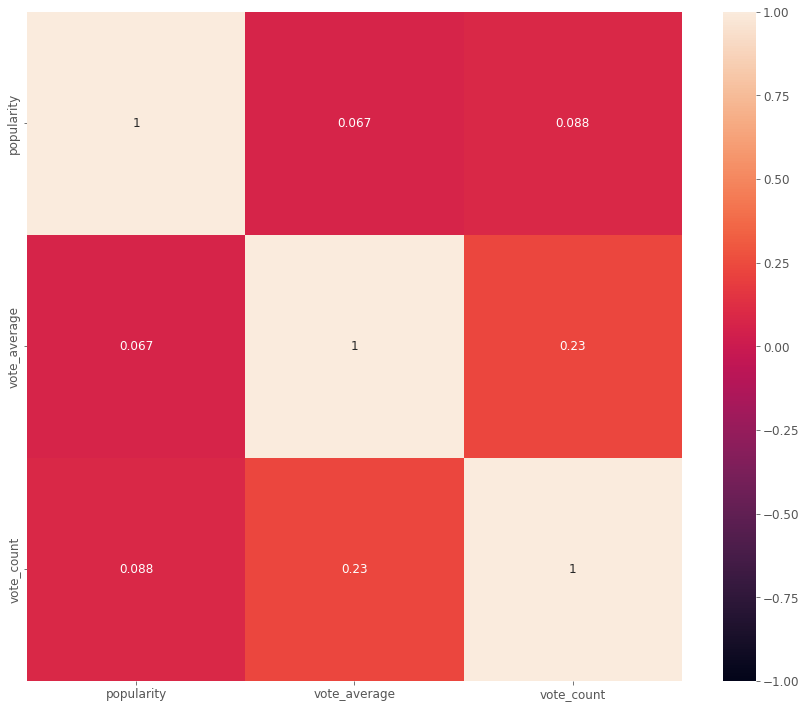

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [26]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# bar plot helper function
def plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=None, hue=hue, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar

# Top 20 Movies by Popularity 

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

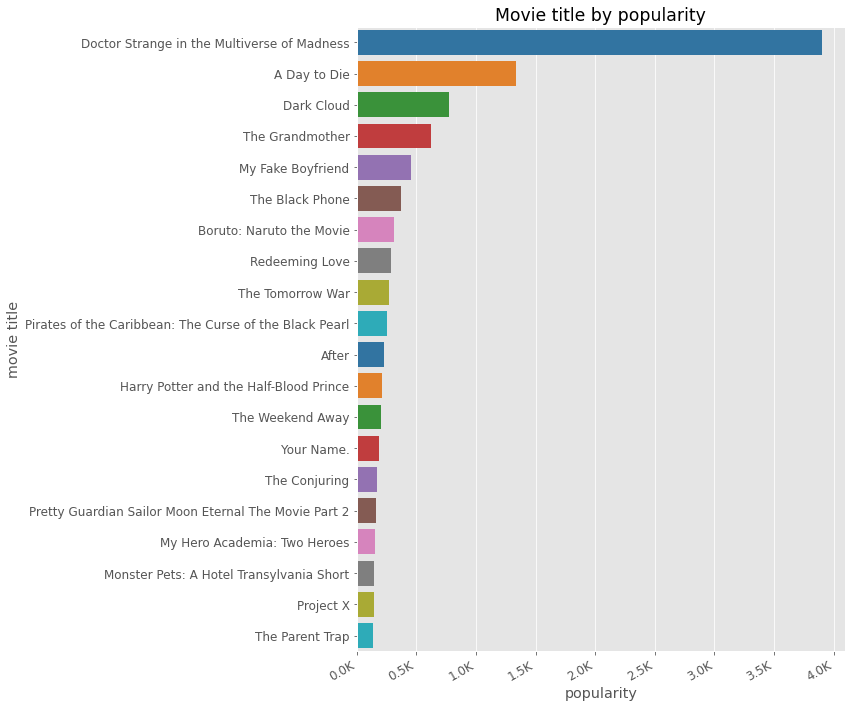

In [27]:
plot_bar(
  data=df.sort_values(by='popularity', ascending=False).head(20),
  x='popularity', y='title', 
  palette='tab10',
  title='Movie title by popularity', xlabel='popularity', ylabel='movie title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Count

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

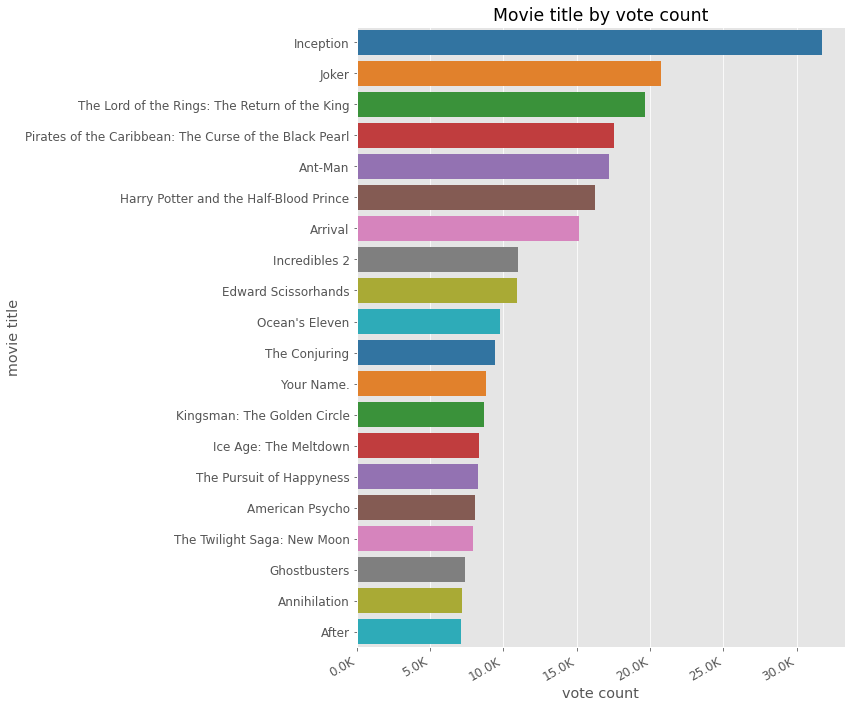

In [28]:
plot_bar(
  data=df.sort_values(by='vote_count', ascending=False).head(20),
  x='vote_count', y='title', 
  palette='tab10',
  title='Movie title by vote count', xlabel='vote count', ylabel='movie title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Average

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

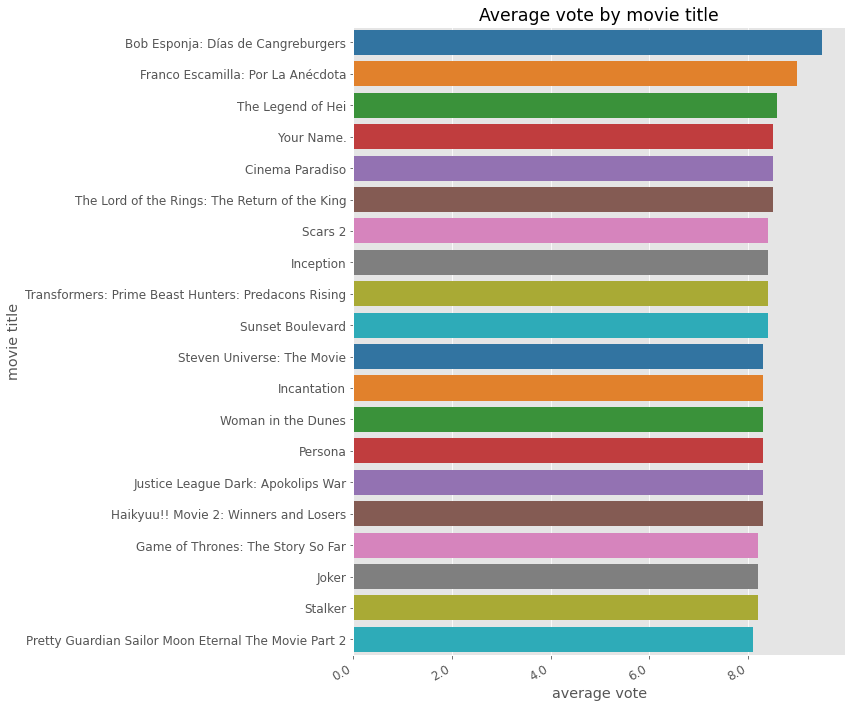

In [29]:
plot_bar(
  data=df.sort_values(by='vote_average', ascending=False).head(20),
  x='vote_average', y='title', 
  palette='tab10',
  title='Average vote by movie title', xlabel='average vote', ylabel='movie title',
  formatter=format_orig
)

# Movies With Release Date

In [30]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []


for pg in popular_movies[:500]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [31]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,453395,en,3901.541,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2439
1,2,False,864116,en,1337.647,/8Kce1utfytAG5m1PbtVoDzmDZJH.jpg,2022-03-04,A Day to Die,6.2,79
2,3,False,897424,en,772.922,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26
3,4,False,661791,es,622.955,/eIUixNvox4U4foL5Z9KbN9HXYSM.jpg,2022-01-28,The Grandmother,5.9,184
4,5,False,908762,en,457.800,/7l9qEWdSzki33Q3SKD1d5uvJBEo.jpg,2022-06-10,My Fake Boyfriend,6.4,22


In [32]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,453395,en,3901.541,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2439
1,864116,en,1337.647,/8Kce1utfytAG5m1PbtVoDzmDZJH.jpg,2022-03-04,A Day to Die,6.2,79
2,897424,en,772.922,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26
3,661791,es,622.955,/eIUixNvox4U4foL5Z9KbN9HXYSM.jpg,2022-01-28,The Grandmother,5.9,184
4,908762,en,457.800,/7l9qEWdSzki33Q3SKD1d5uvJBEo.jpg,2022-06-10,My Fake Boyfriend,6.4,22


In [33]:
df1.shape

(500, 8)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        500 non-null    object 
 4   release_date       500 non-null    object 
 5   title              500 non-null    object 
 6   vote_average       500 non-null    float64
 7   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 31.4+ KB


In [35]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [36]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [37]:
df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [38]:
df1['year'] = df1['release_date'].dt.year                       # extract year
df1['month'] = df1['release_date'].dt.month                     # extract month
df1['day'] = df1['release_date'].dt.day                         # extract day
df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
df1['week'] = df1['release_date'].dt.week                       # extract week
df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,3901.541,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2439,2022.0,5.0,4.0,Wednesday,18.0,2.0
1,864116,en,1337.647,/8Kce1utfytAG5m1PbtVoDzmDZJH.jpg,2022-03-04,A Day to Die,6.2,79,2022.0,3.0,4.0,Friday,9.0,1.0
2,897424,en,772.922,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26,2022.0,5.0,9.0,Monday,19.0,2.0
3,661791,es,622.955,/eIUixNvox4U4foL5Z9KbN9HXYSM.jpg,2022-01-28,The Grandmother,5.9,184,2022.0,1.0,28.0,Friday,4.0,1.0
4,908762,en,457.800,/7l9qEWdSzki33Q3SKD1d5uvJBEo.jpg,2022-06-10,My Fake Boyfriend,6.4,22,2022.0,6.0,10.0,Friday,23.0,2.0


In [39]:
df1.query("release_date == 'NaT'")                                # check movies without release date 

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
104,615129,en,38.924,/knr2XAbotEtc2X2diStLvv4ovPX.jpg,NaT,Pokémon Detective Pikachu 2,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df1_drop = df1[~df1['release_date'].isna()]                       # drop movies without release date
df1_drop.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,3901.541,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2439,2022.0,5.0,4.0,Wednesday,18.0,2.0
1,864116,en,1337.647,/8Kce1utfytAG5m1PbtVoDzmDZJH.jpg,2022-03-04,A Day to Die,6.2,79,2022.0,3.0,4.0,Friday,9.0,1.0
2,897424,en,772.922,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26,2022.0,5.0,9.0,Monday,19.0,2.0
3,661791,es,622.955,/eIUixNvox4U4foL5Z9KbN9HXYSM.jpg,2022-01-28,The Grandmother,5.9,184,2022.0,1.0,28.0,Friday,4.0,1.0
4,908762,en,457.800,/7l9qEWdSzki33Q3SKD1d5uvJBEo.jpg,2022-06-10,My Fake Boyfriend,6.4,22,2022.0,6.0,10.0,Friday,23.0,2.0


In [41]:
 # convert date information to integer
df1_drop[['year', 'month', 'day', 'week', 'quarter']] = df1_drop[['year', 'month', 'day', 'week', 'quarter']].applymap(lambda x: int(x))  
df1_drop.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,3901.541,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-05-04,Doctor Strange in the Multiverse of Madness,7.5,2439,2022,5,4,Wednesday,18,2
1,864116,en,1337.647,/8Kce1utfytAG5m1PbtVoDzmDZJH.jpg,2022-03-04,A Day to Die,6.2,79,2022,3,4,Friday,9,1
2,897424,en,772.922,/q1ngkvPCnOYKeyNZjg8QqvaSnuZ.jpg,2022-05-09,Dark Cloud,6.7,26,2022,5,9,Monday,19,2
3,661791,es,622.955,/eIUixNvox4U4foL5Z9KbN9HXYSM.jpg,2022-01-28,The Grandmother,5.9,184,2022,1,28,Friday,4,1
4,908762,en,457.800,/7l9qEWdSzki33Q3SKD1d5uvJBEo.jpg,2022-06-10,My Fake Boyfriend,6.4,22,2022,6,10,Friday,23,2


In [42]:
df1_drop.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,499.0,499,499,499,499,499
unique,499.0,20,499,483,498,7
top,22.0,en,/9Gtg2DzBhmYamXBS1hKAhiwbBKS.jpg,2022-06-24 00:00:00,Project X,Friday
freq,1.0,367,1,3,2,180
first,NaN,NaN,NaN,1922-09-18 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2025-06-01 00:00:00,NaN,NaN


In [43]:
df1_drop.drop(columns=['year', 'month', 'day', 'week', 'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,499.000000,499.000000,499.000000
mean,45.653104,6.341283,1358.358717
std,192.765956,1.464568,2893.764318
min,9.964000,0.000000,0.000000
25%,12.485000,5.900000,90.500000
50%,17.380000,6.500000,344.000000
75%,32.386500,7.100000,1335.500000
max,3901.541000,9.500000,31729.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

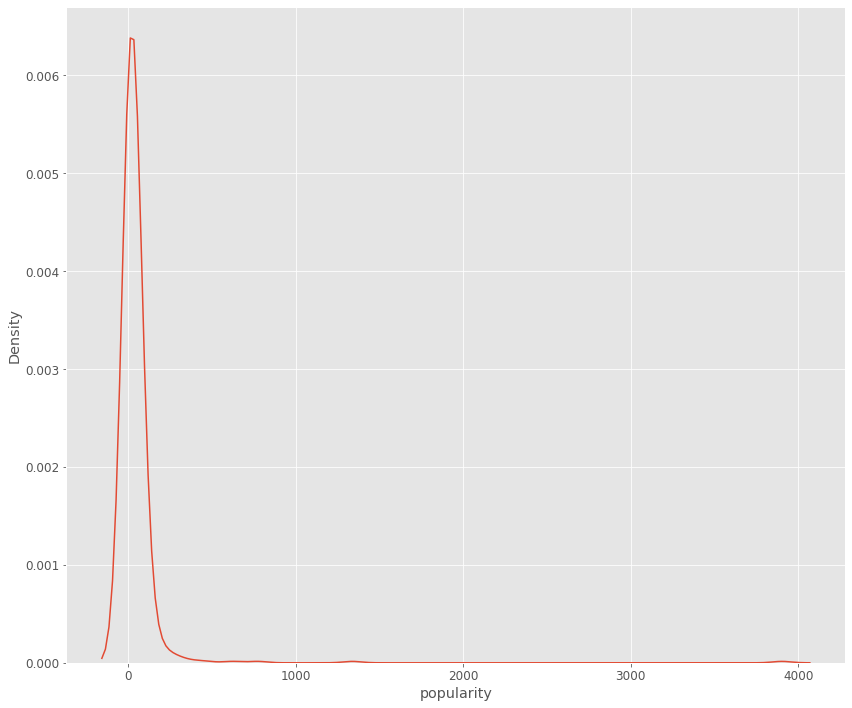

In [44]:
plotkde(data=df1_drop, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

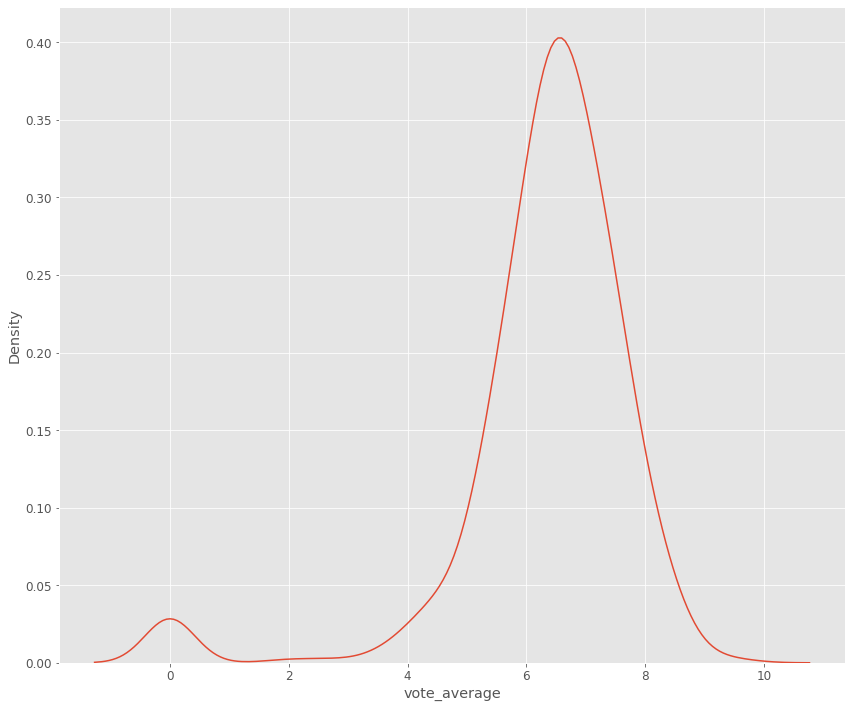

In [45]:
plotkde(data=df1_drop, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

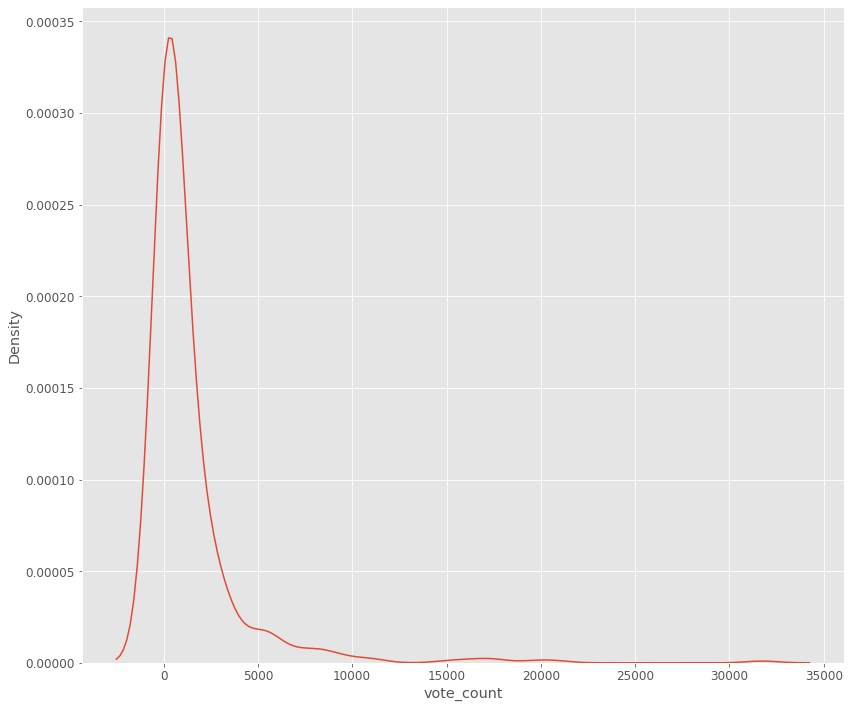

In [46]:
plotkde(data=df1_drop, x='vote_count')

# Missing Values Exploration

In [47]:
df1_drop.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

<AxesSubplot:>

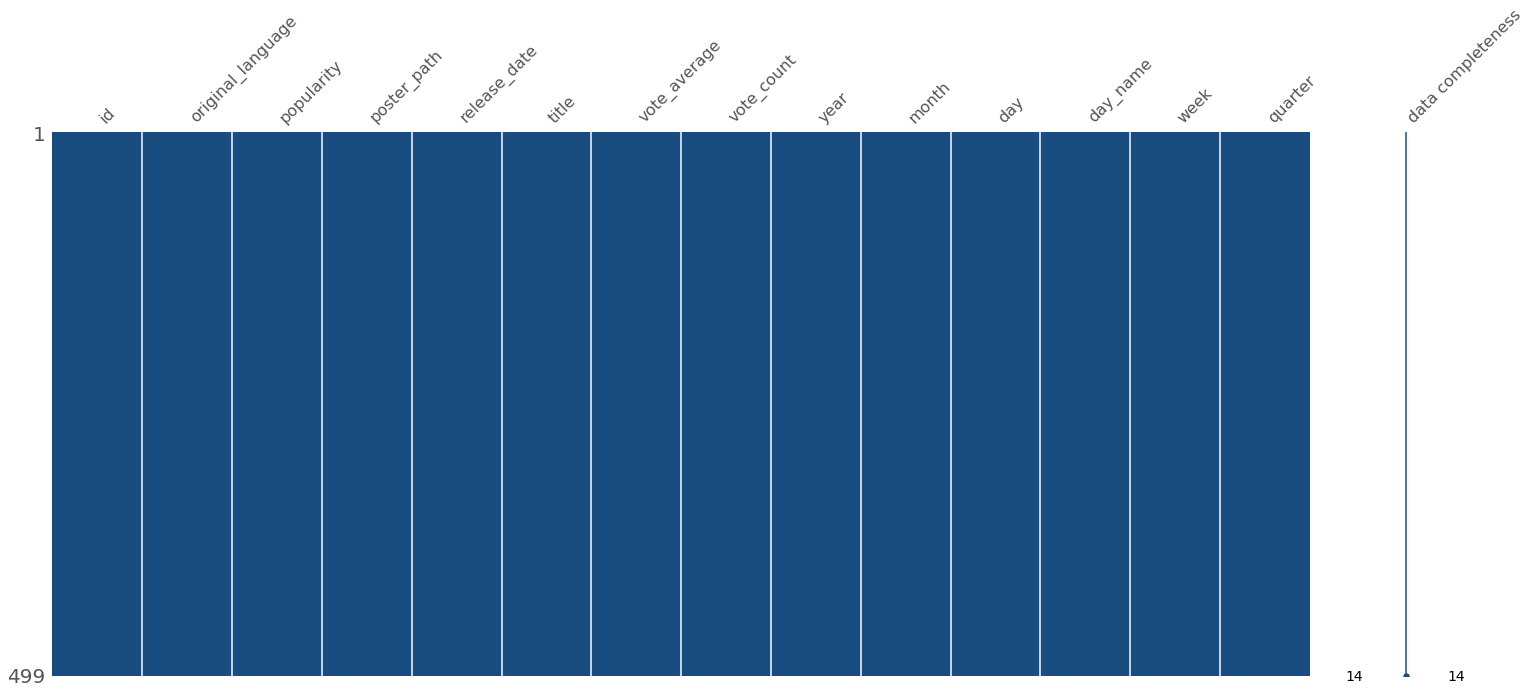

In [48]:
msno.matrix(df1_drop, labels=True, sort='descending', color=(0.1, 0.3, 0.5))

In [49]:
df1_drop.duplicated().sum()                                      # check for duplicates

0

In [50]:
df1_drop.loc[df1_drop.duplicated(subset=['id'])]                 # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

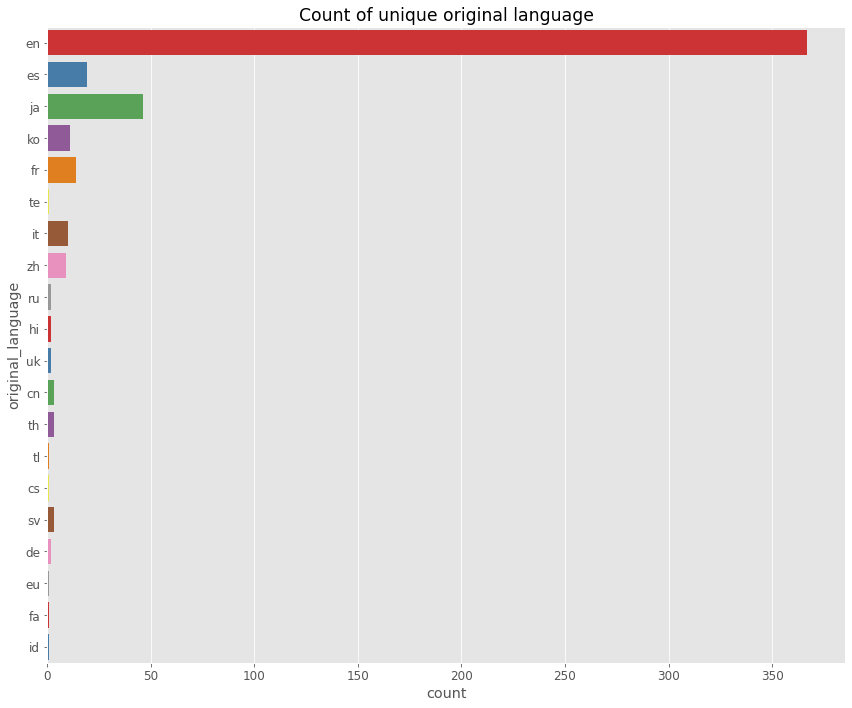

In [51]:
ax1 = sns.countplot(
  data=df1_drop,
  y='original_language', palette='Set1',
)

ax1.set(title='Count of unique original language')

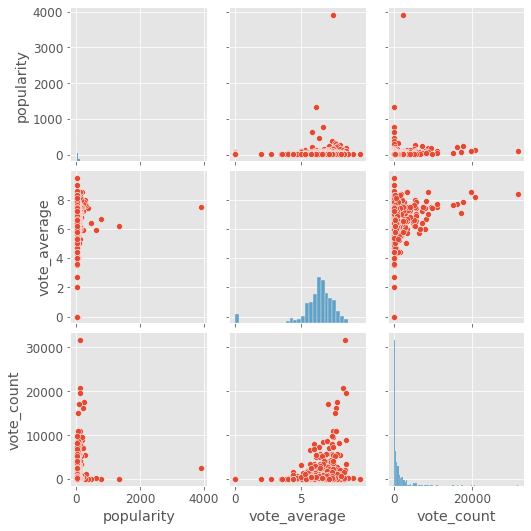

In [52]:
sns.pairplot(df1_drop[['popularity', 'vote_average', 'vote_count']])

In [53]:
df_corr1 = df1_drop[['popularity', 'vote_average', 'vote_count']].corr()
df_corr1

,popularity,vote_average,vote_count
popularity,1.000000,0.068019,0.087772
vote_average,0.068019,1.000000,0.233982
vote_count,0.087772,0.233982,1.000000


<AxesSubplot:>

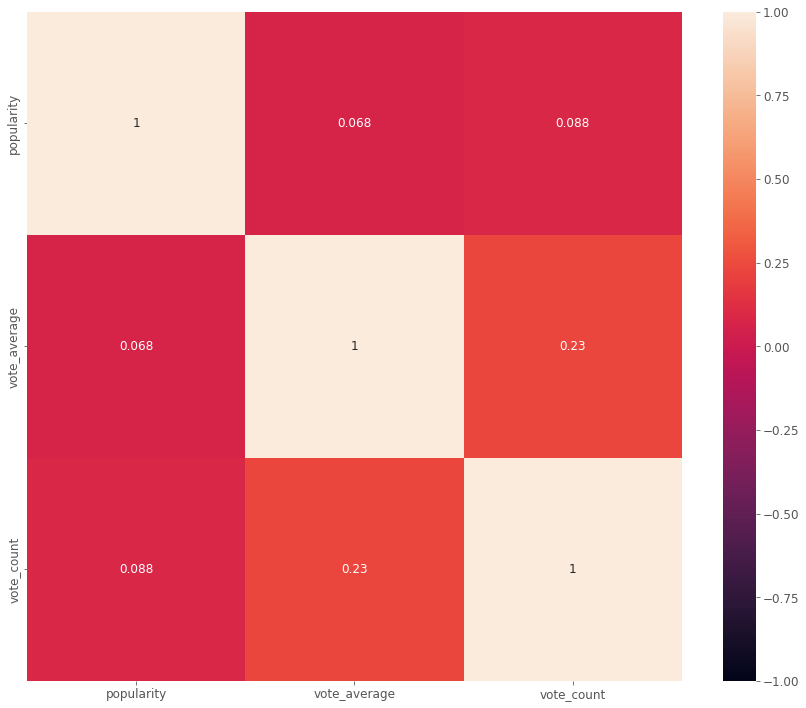

In [54]:
sns.heatmap(df_corr1, annot=True, vmin=-1, vmax=1)

# Movie Popularity Exploration

[Text(0.5, 1.0, 'Movie popularity by week'),
 Text(0.5, 0, 'week'),
 Text(0, 0.5, 'popularity')]

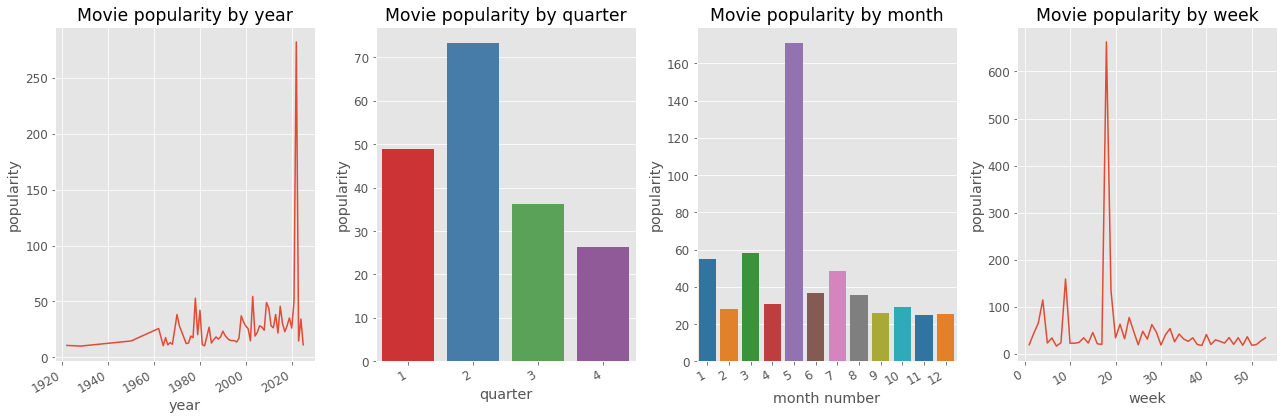

In [55]:
# create figure and axis
fig, (axs1, axs2, axs3, axs4) = plt.subplots(1, 4, figsize=(18, 6))
fig.autofmt_xdate()

# plot popularity by year
sns.lineplot(data=df1_drop, x='year', y='popularity', ci=None, ax=axs1)
axs1.set(title='Movie popularity by year', xlabel='year', ylabel='popularity')

# plot popularity by quarter
sns.barplot(data=df1_drop, x='quarter', y='popularity', ci=None, ax=axs2, palette='Set1')
axs2.set(title='Movie popularity by quarter', xlabel='quarter', ylabel='popularity')

# plot popularity by month
sns.barplot(data=df1_drop, x='month', y='popularity', ci=None, ax=axs3, palette='tab10')
axs3.set(title='Movie popularity by month', xlabel='month number', ylabel='popularity')

# plot popularity by week
sns.lineplot(data=df1_drop, x='week', y='popularity', ci=None, ax=axs4)
axs4.set(title='Movie popularity by week', xlabel='week', ylabel='popularity')